In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import sys
sys.path.append('../')

from glash_v2 import glash_discriminator, glash_generator, Glash
from helpers import toy_data, show_samples, make_animation

2021-11-29 18:23:07.025970: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


(64, 2)


2021-11-29 18:23:08.163261: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-29 18:23:08.163961: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-29 18:23:08.216012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-29 18:23:08.216345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-11-29 18:23:08.216362: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-29 18:23:08.217692: I tensorflow/stream_executor/platform/defa

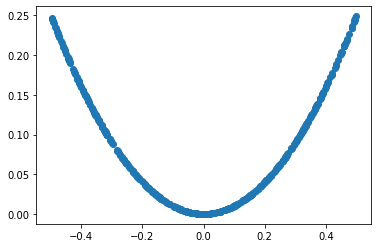

In [2]:
# Create the training dataset
data = toy_data(500, -0.5, 0.5)
data = data.astype('float32')
plt.scatter(data[:, 0], data[:, 1])

train_data = tf.data.Dataset.from_tensor_slices(data)
train_data = train_data.batch(64).prefetch(32)

In [3]:
glash = Glash(glash_discriminator(), glash_generator())
glash.compile(
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adam(),
    tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [4]:
generated_point_list = []

cbk = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: show_samples(generated_point_list, epoch, glash.generator, data))

history = glash.fit(train_data, epochs=3000, callbacks=[cbk], verbose=True)

Epoch 1/5000


2021-11-29 18:23:09.257344: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-29 18:23:09.278733: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-11-29 18:23:09.353217: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


8/8 [==============================] - 1s 2ms/step - d_loss: 0.7506 - g_loss: 0.7295
Epoch 2/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7367 - g_loss: 0.7226
Epoch 3/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7204 - g_loss: 0.7480
Epoch 4/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7091 - g_loss: 0.7399
Epoch 5/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.7641
Epoch 6/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6832 - g_loss: 0.8014
Epoch 7/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6697 - g_loss: 0.8260
Epoch 8/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6580 - g_loss: 0.8429
Epoch 9/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6417 - g_loss: 0.8850
Epoch 10/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6230 - g_loss: 0.9287
Epoch 11/5000
8/8 [=============

Epoch 84/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6736 - g_loss: 0.7257
Epoch 85/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6898 - g_loss: 0.6894
Epoch 86/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7114 - g_loss: 0.6549
Epoch 87/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7102 - g_loss: 0.6569
Epoch 88/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7014 - g_loss: 0.6796
Epoch 89/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.7013
Epoch 90/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.7061
Epoch 91/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6891 - g_loss: 0.7130
Epoch 92/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6887 - g_loss: 0.7140
Epoch 93/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6862 - g_loss: 0.7098
Epoch 94/5

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7206 - g_loss: 0.6337
Epoch 167/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7074 - g_loss: 0.6745
Epoch 168/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6976 - g_loss: 0.7092
Epoch 169/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.7171
Epoch 170/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6885 - g_loss: 0.7280
Epoch 171/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6854 - g_loss: 0.7283
Epoch 172/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6831 - g_loss: 0.7247
Epoch 173/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6826 - g_loss: 0.7163
Epoch 174/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6833 - g_loss: 0.7030
Epoch 175/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6878
Epoch 176/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7076 - g_loss: 0.6473
Epoch 249/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7300 - g_loss: 0.6115
Epoch 250/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7233 - g_loss: 0.6357
Epoch 251/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7024 - g_loss: 0.6822
Epoch 252/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6867 - g_loss: 0.7332
Epoch 253/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6881 - g_loss: 0.7362
Epoch 254/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6887 - g_loss: 0.7320
Epoch 255/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6863 - g_loss: 0.7308
Epoch 256/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6829 - g_loss: 0.7247
Epoch 257/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6803 - g_loss: 0.7184
Epoch 258/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6612 - g_loss: 0.7477
Epoch 331/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6571 - g_loss: 0.7529
Epoch 332/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6523 - g_loss: 0.7576
Epoch 333/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6483 - g_loss: 0.7611
Epoch 334/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6451 - g_loss: 0.7607
Epoch 335/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6476 - g_loss: 0.7447
Epoch 336/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6534
Epoch 337/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7562 - g_loss: 0.5562
Epoch 338/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7755 - g_loss: 0.5424
Epoch 339/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7499 - g_loss: 0.6057
Epoch 340/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6811 - g_loss: 0.6911
Epoch 412/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6859 - g_loss: 0.6876
Epoch 413/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6896 - g_loss: 0.6804
Epoch 414/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6970 - g_loss: 0.6686
Epoch 415/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6998 - g_loss: 0.6658
Epoch 416/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6993 - g_loss: 0.6756
Epoch 417/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6919
Epoch 418/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.7037
Epoch 419/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6886 - g_loss: 0.7143
Epoch 420/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6843 - g_loss: 0.7247
Epoch 421/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7249 - g_loss: 0.6242
Epoch 494/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7286 - g_loss: 0.6266
Epoch 495/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7190 - g_loss: 0.6507
Epoch 496/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7084 - g_loss: 0.6798
Epoch 497/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7030 - g_loss: 0.7000
Epoch 498/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7016 - g_loss: 0.7049
Epoch 499/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6970 - g_loss: 0.7121
Epoch 500/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.7171
Epoch 501/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6872 - g_loss: 0.7202
Epoch 502/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6826 - g_loss: 0.7230
Epoch 503/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7075 - g_loss: 0.6735
Epoch 576/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.7036
Epoch 577/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6889 - g_loss: 0.7184
Epoch 578/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6852 - g_loss: 0.7298
Epoch 579/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6779 - g_loss: 0.7435
Epoch 580/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6740 - g_loss: 0.7474
Epoch 581/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6699 - g_loss: 0.7491
Epoch 582/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6660 - g_loss: 0.7517
Epoch 583/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.6622 - g_loss: 0.7528
Epoch 584/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6583 - g_loss: 0.7536
Epoch 585/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6472 - g_loss: 0.7442
Epoch 658/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6827 - g_loss: 0.6699
Epoch 659/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7363 - g_loss: 0.5816
Epoch 660/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7817 - g_loss: 0.5310
Epoch 661/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7737 - g_loss: 0.5570
Epoch 662/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7455 - g_loss: 0.6224
Epoch 663/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7201 - g_loss: 0.6978
Epoch 664/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7161 - g_loss: 0.7017
Epoch 665/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7180 - g_loss: 0.7040
Epoch 666/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7142 - g_loss: 0.7083
Epoch 667/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7191 - g_loss: 0.7049
Epoch 739/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7189 - g_loss: 0.7082
Epoch 740/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7154 - g_loss: 0.7139
Epoch 741/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7120 - g_loss: 0.7139
Epoch 742/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7080 - g_loss: 0.7099
Epoch 743/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7031 - g_loss: 0.7094
Epoch 744/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6978 - g_loss: 0.7127
Epoch 745/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.7174
Epoch 746/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6862 - g_loss: 0.7239
Epoch 747/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6820 - g_loss: 0.7279
Epoch 748/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6727 - g_loss: 0.7348
Epoch 820/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6716 - g_loss: 0.7310
Epoch 821/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6769 - g_loss: 0.7134
Epoch 822/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6842 - g_loss: 0.6919
Epoch 823/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6880 - g_loss: 0.6832
Epoch 824/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6892 - g_loss: 0.6791
Epoch 825/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7022 - g_loss: 0.6504
Epoch 826/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7278 - g_loss: 0.6238
Epoch 827/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7287 - g_loss: 0.6237
Epoch 828/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7113 - g_loss: 0.6697
Epoch 829/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6881 - g_loss: 0.7061
Epoch 902/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6876 - g_loss: 0.6974
Epoch 903/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6877 - g_loss: 0.6982
Epoch 904/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6861 - g_loss: 0.7005
Epoch 905/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6879 - g_loss: 0.6982
Epoch 906/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6888 - g_loss: 0.6984
Epoch 907/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.7023
Epoch 908/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6899 - g_loss: 0.6991
Epoch 909/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.7013
Epoch 910/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.7008
Epoch 911/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.6958
Epoch 984/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6891 - g_loss: 0.6974
Epoch 985/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6879 - g_loss: 0.6993
Epoch 986/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6891 - g_loss: 0.6957
Epoch 987/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6886 - g_loss: 0.6966
Epoch 988/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6895 - g_loss: 0.6955
Epoch 989/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6895 - g_loss: 0.6983
Epoch 990/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6891 - g_loss: 0.6973
Epoch 991/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6892 - g_loss: 0.6970
Epoch 992/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6883 - g_loss: 0.6962
Epoch 993/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6898 - g_loss: 0.6937
Epoch 1065/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6955
Epoch 1066/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6902 - g_loss: 0.6935
Epoch 1067/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6953
Epoch 1068/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6953
Epoch 1069/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.7005
Epoch 1070/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.6960
Epoch 1071/5000
8/8 [==============================] - ETA: 0s - d_loss: 0.6911 - g_loss: 0.69 - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6955
Epoch 1072/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6961
Epoch 1073/5000
8/8 [==============================] - 0s 2ms/ste

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6941
Epoch 1145/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.6958
Epoch 1146/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6953
Epoch 1147/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6979
Epoch 1148/5000
8/8 [==============================] - ETA: 0s - d_loss: 0.6927 - g_loss: 0.69 - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6976
Epoch 1149/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6989
Epoch 1150/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6974
Epoch 1151/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6938
Epoch 1152/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6937
Epoch 1153/5000
8/8 [==============================] - 0s 2ms/ste

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6960
Epoch 1225/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6970
Epoch 1226/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6963
Epoch 1227/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6934
Epoch 1228/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6974
Epoch 1229/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6935
Epoch 1230/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6958
Epoch 1231/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6971
Epoch 1232/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6953
Epoch 1233/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6922
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6911
Epoch 1306/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6915
Epoch 1307/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6938
Epoch 1308/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6989
Epoch 1309/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6973
Epoch 1310/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6959
Epoch 1311/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6912
Epoch 1312/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6945
Epoch 1313/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6970
Epoch 1314/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6984
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6926
Epoch 1387/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6953
Epoch 1388/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6968
Epoch 1389/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6959
Epoch 1390/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6977
Epoch 1391/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6970
Epoch 1392/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6944
Epoch 1393/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6922
Epoch 1394/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6934
Epoch 1395/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6946
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6930
Epoch 1468/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6943
Epoch 1469/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6955
Epoch 1470/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.6927 - g_loss: 0.6939
Epoch 1471/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6935
Epoch 1472/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6970
Epoch 1473/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6967
Epoch 1474/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6941
Epoch 1475/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6935
Epoch 1476/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6942
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6966
Epoch 1549/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6969
Epoch 1550/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6945
Epoch 1551/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6928
Epoch 1552/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6951
Epoch 1553/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6963
Epoch 1554/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6937
Epoch 1555/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6951
Epoch 1556/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6941
Epoch 1557/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6935
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6949
Epoch 1629/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6957
Epoch 1630/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6950
Epoch 1631/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6930
Epoch 1632/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6924
Epoch 1633/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6946
Epoch 1634/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6968
Epoch 1635/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6943
Epoch 1636/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6925
Epoch 1637/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6928
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6957
Epoch 1710/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6935
Epoch 1711/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6924
Epoch 1712/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6937
Epoch 1713/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6924
Epoch 1714/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6945
Epoch 1715/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6969
Epoch 1716/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6945
Epoch 1717/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6942
Epoch 1718/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6958
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6922
Epoch 1791/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6922 - g_loss: 0.6932
Epoch 1792/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6934
Epoch 1793/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6934
Epoch 1794/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6929
Epoch 1795/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6937
Epoch 1796/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6956
Epoch 1797/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6953
Epoch 1798/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6934
Epoch 1799/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6945
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6952
Epoch 1872/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6964
Epoch 1873/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6973
Epoch 1874/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6923
Epoch 1875/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6909
Epoch 1876/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6919
Epoch 1877/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6974
Epoch 1878/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.6997
Epoch 1879/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6888 - g_loss: 0.7004
Epoch 1880/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6884 - g_loss: 0.6980
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6952
Epoch 1953/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6964
Epoch 1954/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6955
Epoch 1955/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6936
Epoch 1956/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6940
Epoch 1957/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6977
Epoch 1958/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6971
Epoch 1959/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6914
Epoch 1960/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6922
Epoch 1961/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6964
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6892 - g_loss: 0.6995
Epoch 2033/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6969
Epoch 2034/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.6945
Epoch 2035/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6927
Epoch 2036/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6938
Epoch 2037/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6903
Epoch 2038/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6887
Epoch 2039/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6932
Epoch 2040/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6965
Epoch 2041/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6982
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6883 - g_loss: 0.7003
Epoch 2114/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6879 - g_loss: 0.6911
Epoch 2115/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6904
Epoch 2116/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6956 - g_loss: 0.6903
Epoch 2117/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6983 - g_loss: 0.6965
Epoch 2118/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6989
Epoch 2119/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6964
Epoch 2120/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6900 - g_loss: 0.6957
Epoch 2121/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6885 - g_loss: 0.6977
Epoch 2122/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6892 - g_loss: 0.7010
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.6946
Epoch 2195/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.6949
Epoch 2196/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6947
Epoch 2197/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6959
Epoch 2198/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6932
Epoch 2199/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6940
Epoch 2200/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6885 - g_loss: 0.6969
Epoch 2201/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6874 - g_loss: 0.7004
Epoch 2202/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6876 - g_loss: 0.7025
Epoch 2203/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6876 - g_loss: 0.7028
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6897 - g_loss: 0.7005
Epoch 2276/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6888 - g_loss: 0.6978
Epoch 2277/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.6975
Epoch 2278/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6900 - g_loss: 0.6959
Epoch 2279/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6989
Epoch 2280/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6981
Epoch 2281/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6947
Epoch 2282/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6925
Epoch 2283/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6936
Epoch 2284/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6977
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.7012
Epoch 2357/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.7023
Epoch 2358/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.7003
Epoch 2359/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6887 - g_loss: 0.6971
Epoch 2360/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6892
Epoch 2361/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6957
Epoch 2362/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.6928
Epoch 2363/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.6948
Epoch 2364/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6926
Epoch 2365/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6941
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.6918 - g_loss: 0.7049
Epoch 2438/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6986
Epoch 2439/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6944
Epoch 2440/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6905
Epoch 2441/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.6897
Epoch 2442/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6876
Epoch 2443/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6888
Epoch 2444/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6934
Epoch 2445/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.6990
Epoch 2446/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6880 - g_loss: 0.6997
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6979
Epoch 2519/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6983
Epoch 2520/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6955
Epoch 2521/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6961
Epoch 2522/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6999
Epoch 2523/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6961
Epoch 2524/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6954
Epoch 2525/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6897 - g_loss: 0.7003
Epoch 2526/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6873 - g_loss: 0.7045
Epoch 2527/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6878 - g_loss: 0.7012
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6902 - g_loss: 0.6972
Epoch 2600/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6927
Epoch 2601/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6973
Epoch 2602/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6991
Epoch 2603/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6991
Epoch 2604/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6978
Epoch 2605/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6879 - g_loss: 0.6981
Epoch 2606/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6864 - g_loss: 0.6998
Epoch 2607/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6849 - g_loss: 0.6988
Epoch 2608/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6844 - g_loss: 0.6948
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6986
Epoch 2681/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6904
Epoch 2682/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6910
Epoch 2683/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6938
Epoch 2684/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6964
Epoch 2685/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6949
Epoch 2686/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6934
Epoch 2687/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6927
Epoch 2688/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6910
Epoch 2689/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6957
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6964
Epoch 2762/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.6975
Epoch 2763/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6974
Epoch 2764/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6927
Epoch 2765/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6941
Epoch 2766/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6968
Epoch 2767/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6974
Epoch 2768/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.6910
Epoch 2769/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6927
Epoch 2770/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6944
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6965
Epoch 2843/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6959
Epoch 2844/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6928
Epoch 2845/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6930
Epoch 2846/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6950
Epoch 2847/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6963
Epoch 2848/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.6974
Epoch 2849/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6968
Epoch 2850/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6970
Epoch 2851/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6950
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6967
Epoch 2924/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6955
Epoch 2925/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6950
Epoch 2926/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6946
Epoch 2927/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6948
Epoch 2928/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6937
Epoch 2929/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6934
Epoch 2930/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6942
Epoch 2931/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6940
Epoch 2932/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6938
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6959
Epoch 3005/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6941
Epoch 3006/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6938
Epoch 3007/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6959
Epoch 3008/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6941
Epoch 3009/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6956
Epoch 3010/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6945
Epoch 3011/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6939
Epoch 3012/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6928
Epoch 3013/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6969
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6959
Epoch 3086/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6951
Epoch 3087/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.6975
Epoch 3088/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6953
Epoch 3089/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6934
Epoch 3090/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6938
Epoch 3091/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6949
Epoch 3092/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6947
Epoch 3093/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6932
Epoch 3094/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6991
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6946
Epoch 3166/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6939
Epoch 3167/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6933
Epoch 3168/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6949
Epoch 3169/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6983
Epoch 3170/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6952
Epoch 3171/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6938
Epoch 3172/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6937
Epoch 3173/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6949
Epoch 3174/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6958
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6979
Epoch 3247/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6931
Epoch 3248/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6909 - g_loss: 0.6935
Epoch 3249/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6941
Epoch 3250/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6936
Epoch 3251/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6950
Epoch 3252/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6947
Epoch 3253/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6920
Epoch 3254/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6958
Epoch 3255/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6965
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6972
Epoch 3327/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6958
Epoch 3328/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6940
Epoch 3329/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6931
Epoch 3330/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6939
Epoch 3331/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6931
Epoch 3332/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6942
Epoch 3333/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6938
Epoch 3334/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6933
Epoch 3335/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6968
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6926
Epoch 3408/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6942
Epoch 3409/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6968
Epoch 3410/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6946
Epoch 3411/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6949
Epoch 3412/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6949
Epoch 3413/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6940
Epoch 3414/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6936
Epoch 3415/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6918
Epoch 3416/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6959
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6943
Epoch 3489/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6942
Epoch 3490/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6954
Epoch 3491/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6935
Epoch 3492/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6954
Epoch 3493/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6960
Epoch 3494/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6985
Epoch 3495/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6935
Epoch 3496/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6921
Epoch 3497/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6935
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6898 - g_loss: 0.6958
Epoch 3570/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.6952
Epoch 3571/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6962
Epoch 3572/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6945
Epoch 3573/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6883
Epoch 3574/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6925
Epoch 3575/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6949
Epoch 3576/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6965
Epoch 3577/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6946
Epoch 3578/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6928
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6961
Epoch 3651/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6942
Epoch 3652/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6920
Epoch 3653/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6912
Epoch 3654/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6940
Epoch 3655/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6981
Epoch 3656/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6933
Epoch 3657/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6919
Epoch 3658/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6927
Epoch 3659/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6949
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6953
Epoch 3732/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6939
Epoch 3733/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6939
Epoch 3734/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6919
Epoch 3735/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6937
Epoch 3736/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6972
Epoch 3737/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6935 - g_loss: 0.6950
Epoch 3738/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6935
Epoch 3739/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6952
Epoch 3740/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6920
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6948
Epoch 3812/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6937
Epoch 3813/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6938
Epoch 3814/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6937
Epoch 3815/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6947
Epoch 3816/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6957
Epoch 3817/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6952
Epoch 3818/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6934
Epoch 3819/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6949
Epoch 3820/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6943
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6919
Epoch 3893/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6945
Epoch 3894/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6937
Epoch 3895/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6954
Epoch 3896/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6927
Epoch 3897/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6925
Epoch 3898/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6946
Epoch 3899/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6960
Epoch 3900/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6949
Epoch 3901/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6924
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6957
Epoch 3974/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6947
Epoch 3975/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6950
Epoch 3976/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6941
Epoch 3977/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6952
Epoch 3978/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6944
Epoch 3979/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6930
Epoch 3980/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6942
Epoch 3981/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6952
Epoch 3982/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6975
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6943
Epoch 4055/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6930
Epoch 4056/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6956
Epoch 4057/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6961
Epoch 4058/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6949
Epoch 4059/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6948
Epoch 4060/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6926
Epoch 4061/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6927
Epoch 4062/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6952
Epoch 4063/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6966
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6939
Epoch 4136/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6942
Epoch 4137/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6939
Epoch 4138/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6943
Epoch 4139/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6937
Epoch 4140/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6930
Epoch 4141/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6934
Epoch 4142/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6945
Epoch 4143/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6952
Epoch 4144/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6942
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6940
Epoch 4217/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6950
Epoch 4218/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6966
Epoch 4219/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6985
Epoch 4220/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6902 - g_loss: 0.6951
Epoch 4221/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6925
Epoch 4222/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6935
Epoch 4223/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6966
Epoch 4224/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6953
Epoch 4225/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6947
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6986
Epoch 4298/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6947
Epoch 4299/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6932
Epoch 4300/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6952
Epoch 4301/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6960
Epoch 4302/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6948
Epoch 4303/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6918
Epoch 4304/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6937
Epoch 4305/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6938
Epoch 4306/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6929
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6942
Epoch 4379/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6942
Epoch 4380/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6917
Epoch 4381/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6923
Epoch 4382/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6913
Epoch 4383/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6965
Epoch 4384/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6952
Epoch 4385/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6917
Epoch 4386/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6934
Epoch 4387/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6980
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6933
Epoch 4460/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6935
Epoch 4461/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6947
Epoch 4462/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6961
Epoch 4463/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6935
Epoch 4464/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6940
Epoch 4465/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6934
Epoch 4466/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6933
Epoch 4467/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6938
Epoch 4468/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6947
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6950
Epoch 4541/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6967
Epoch 4542/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6960
Epoch 4543/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6954
Epoch 4544/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6965
Epoch 4545/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6946
Epoch 4546/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6923
Epoch 4547/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6943
Epoch 4548/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6956
Epoch 4549/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6975
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6934
Epoch 4622/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6951
Epoch 4623/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6964
Epoch 4624/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6947
Epoch 4625/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6946
Epoch 4626/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6943
Epoch 4627/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6959
Epoch 4628/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6943
Epoch 4629/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6937
Epoch 4630/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6954
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6938
Epoch 4703/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6946
Epoch 4704/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6932
Epoch 4705/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6929
Epoch 4706/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6956
Epoch 4707/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6956
Epoch 4708/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6957
Epoch 4709/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6945
Epoch 4710/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6953
Epoch 4711/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6919 - g_loss: 0.6950
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6952
Epoch 4784/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6947
Epoch 4785/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6956
Epoch 4786/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6956
Epoch 4787/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6947
Epoch 4788/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6985
Epoch 4789/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6973
Epoch 4790/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6904 - g_loss: 0.6995
Epoch 4791/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6966
Epoch 4792/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6953
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.7015
Epoch 4865/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6898 - g_loss: 0.6963
Epoch 4866/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6902 - g_loss: 0.6946
Epoch 4867/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6955
Epoch 4868/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6948
Epoch 4869/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6943
Epoch 4870/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6935
Epoch 4871/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6940
Epoch 4872/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6963
Epoch 4873/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6955
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6956
Epoch 4946/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.6943
Epoch 4947/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6959
Epoch 4948/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6916 - g_loss: 0.6946
Epoch 4949/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6908 - g_loss: 0.6943
Epoch 4950/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6942
Epoch 4951/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6961
Epoch 4952/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6965
Epoch 4953/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.6948
Epoch 4954/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.6938
Epoch 

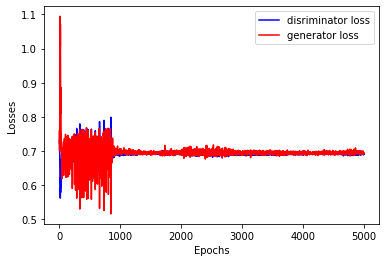

In [5]:
plt.plot(history.history['d_loss'], color='blue', label='disriminator loss')
plt.plot(history.history['g_loss'], color='red', label='generator loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [6]:
make_animation((data[:, 0], data[:, 1]), generated_point_list)

MovieWriter ffmpeg unavailable; using Pillow instead.
